# Importing Libraries

In [1]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Model Selection and Preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
# Use ColumnTransformer to apply transformations
from sklearn.compose import ColumnTransformer

# Individual Regressors
from joblib import dump, load
import os
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


# Ensemble Model
from sklearn.ensemble import VotingRegressor

# Performance Metrics
from sklearn.metrics import (
    mean_absolute_error,
    explained_variance_score,
    max_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)
# Hyperparameter Tuning
import optuna

# Explainability Tools
import shap

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")



###  Display basic information about the dataset

In [2]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
basic_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Summary Statistics": data.describe()
}

# Print basic information
print("Shape of the dataset:", basic_info["Shape"])
print("\nColumns:", basic_info["Columns"])
print("\nSummary Statistics:\n")
pd.DataFrame(basic_info["Summary Statistics"])

Shape of the dataset: (9134, 24)

Columns: ['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']

Summary Statistics:



,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Display Missing Values and Duplicates

In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate rows
duplicates = data.duplicated().sum()

# Print results
print("Missing Values:\n", missing_values)
print("\nNumber of Duplicate Rows:", duplicates)


Missing Values:
 Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

Number of Duplicate Rows: 0


### Display Data Types

In [4]:
print("\nData Types:\n", basic_info["Data Types"])


Data Types:
 Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dt

# Initial Insights Before Data Pre Processing

In [5]:
# General Summary
print("Dataset Shape:", data.shape)
print("\nSummary Statistics:\n", data.describe())

# Mean CLV and Range
mean_clv = data['Customer Lifetime Value'].mean()
min_clv = data['Customer Lifetime Value'].min()
max_clv = data['Customer Lifetime Value'].max()
print(f"\nMean CLV: {mean_clv}, Range: {min_clv} - {max_clv}")



Dataset Shape: (9134, 24)

Summary Statistics:
        Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000

### Income and Monthly Premium Auto Insights 

In [6]:
# Distribution of Income
income_distribution = data['Income']
print(f"\nPercentage of customers with zero income: {((income_distribution == 0).sum() / len(data)) * 100:.2f}%")

# Monthly Premium Auto Insights
mean_premium = data['Monthly Premium Auto'].mean()
premium_range = (data['Monthly Premium Auto'].min(), data['Monthly Premium Auto'].max())
print(f"\nMean Monthly Premium Auto: {mean_premium}, Range: {premium_range}")




Percentage of customers with zero income: 25.37%

Mean Monthly Premium Auto: 93.21929056273265, Range: (61, 298)


### Policy Type Analysis and Vehicle Class Analysis

In [7]:
# Policy Type Analysis
policy_type_clv = data.groupby('Policy Type')['Customer Lifetime Value'].mean().sort_values(ascending=False)
print("\nAverage CLV by Policy Type:\n", policy_type_clv)

# Vehicle Class Analysis
vehicle_class_clv = data.groupby('Vehicle Class')['Customer Lifetime Value'].mean().sort_values(ascending=False)
print("\nAverage CLV by Vehicle Class:\n", vehicle_class_clv)




Average CLV by Policy Type:
 Policy Type
Special Auto      8594.245038
Personal Auto     8027.363535
Corporate Auto    7814.409552
Name: Customer Lifetime Value, dtype: float64

Average CLV by Vehicle Class:
 Vehicle Class
Luxury SUV       17122.999134
Luxury Car       17053.348399
Sports Car       10750.989331
SUV              10443.511816
Two-Door Car      6671.030732
Four-Door Car     6631.726607
Name: Customer Lifetime Value, dtype: float64


### Total Claim Amount Analysis and Employment Status Analysis

In [8]:

# Total Claim Amount Insights
mean_claim = data['Total Claim Amount'].mean()
claim_range = (data['Total Claim Amount'].min(), data['Total Claim Amount'].max())
print(f"\nMean Total Claim Amount: {mean_claim}, Range: {claim_range}")

# Employment Status Analysis
employment_clv = data.groupby('EmploymentStatus')['Customer Lifetime Value'].mean().sort_values(ascending=False)
print("\nAverage CLV by Employment Status:\n", employment_clv)




Mean Total Claim Amount: 434.0887943128969, Range: (0.099007, 2893.239678)

Average CLV by Employment Status:
 EmploymentStatus
Employed         8219.117754
Disabled         7847.889354
Medical Leave    7641.822437
Unemployed       7636.319761
Retired          7487.865141
Name: Customer Lifetime Value, dtype: float64


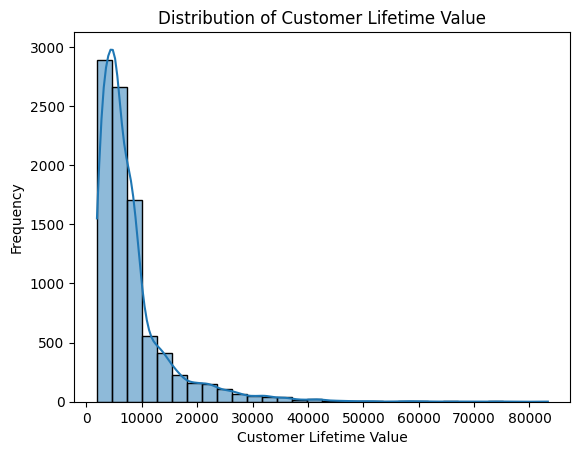

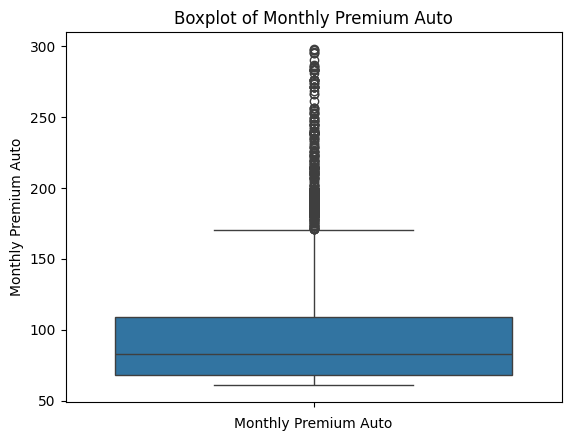

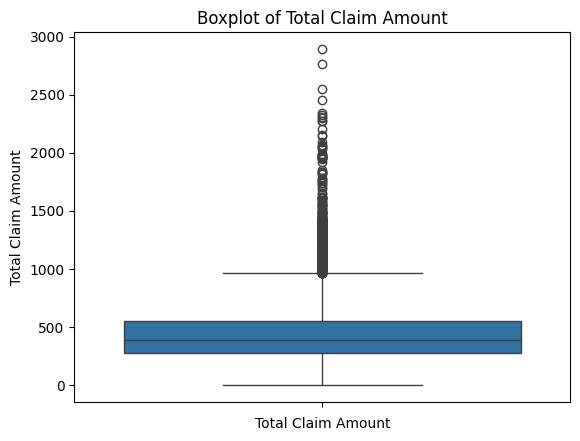

In [9]:
# Visualizations
sns.histplot(data['Customer Lifetime Value'], kde=True, bins=30)
plt.title("Distribution of Customer Lifetime Value")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(data['Monthly Premium Auto'])
plt.title("Boxplot of Monthly Premium Auto")
plt.xlabel("Monthly Premium Auto")
plt.show()

sns.boxplot(data['Total Claim Amount'])
plt.title("Boxplot of Total Claim Amount")
plt.xlabel("Total Claim Amount")
plt.show()

## Separate columns into categorical and numerical

In [10]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()


# Numerical Data Analysis and Handling

#### Distribution and Box Plot analysis

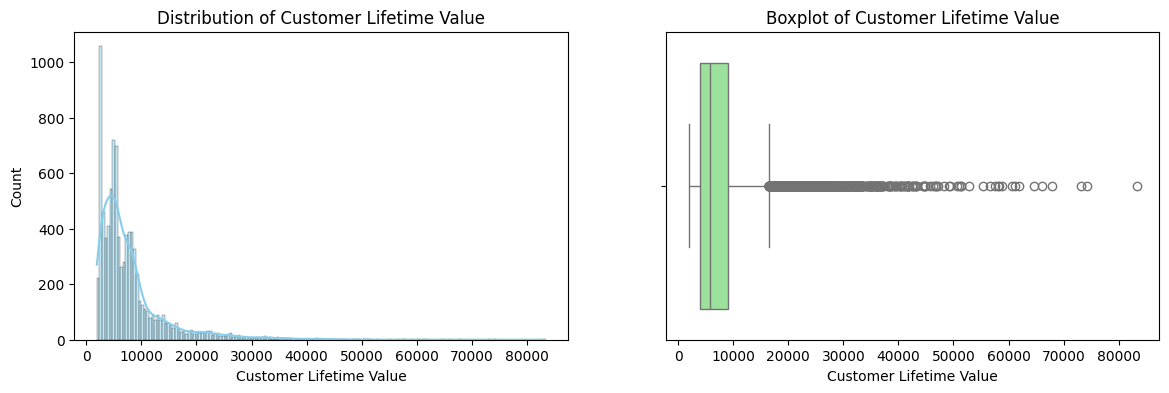

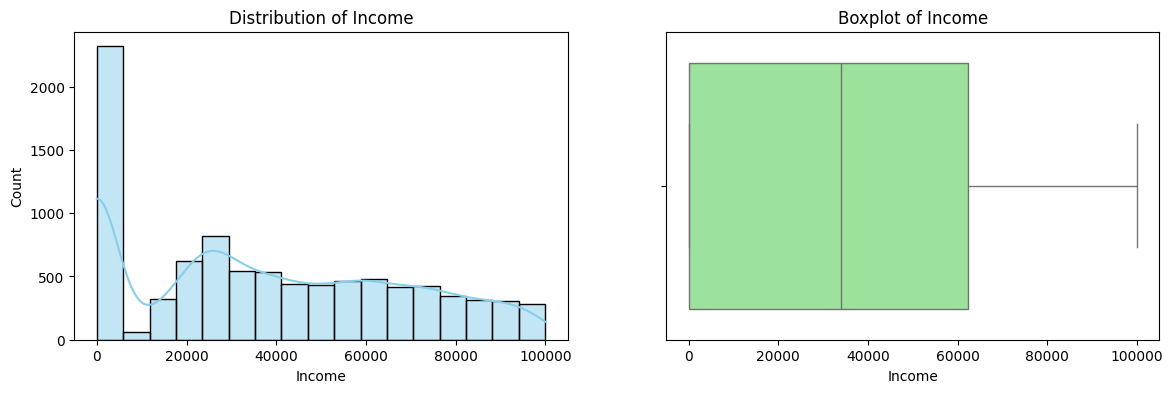

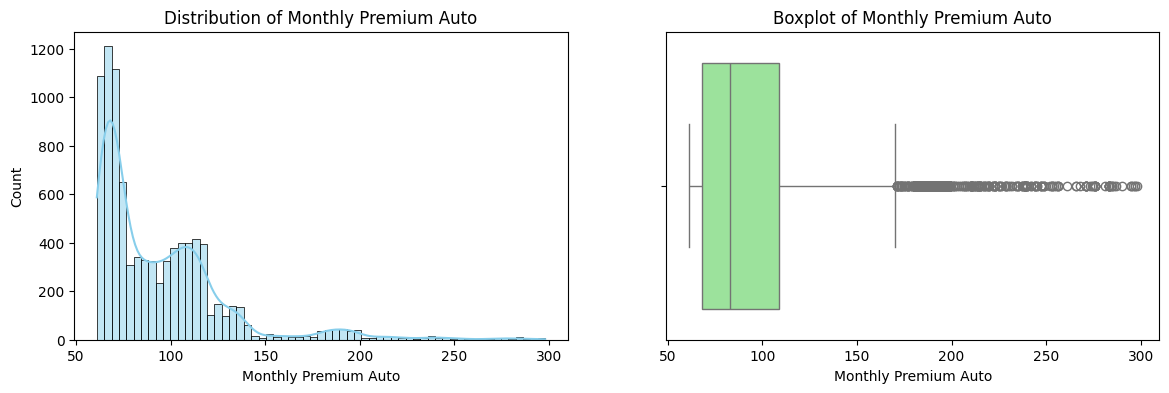

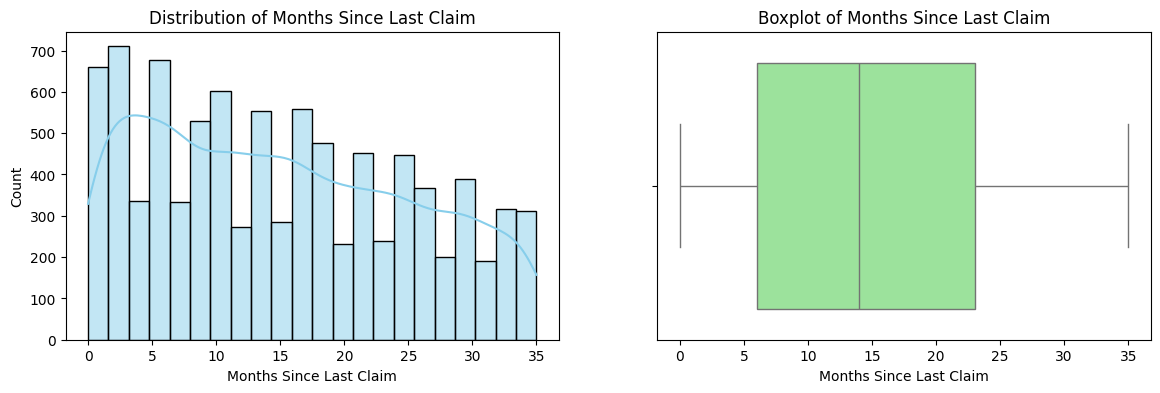

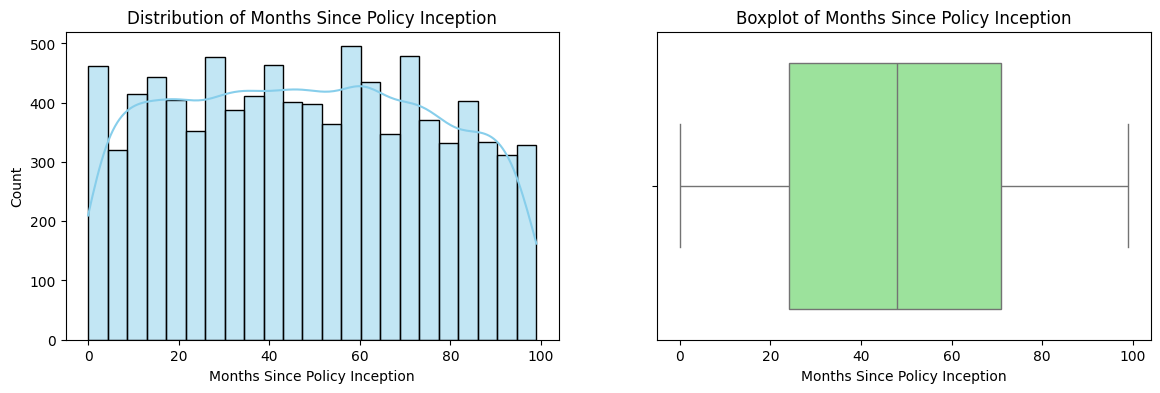

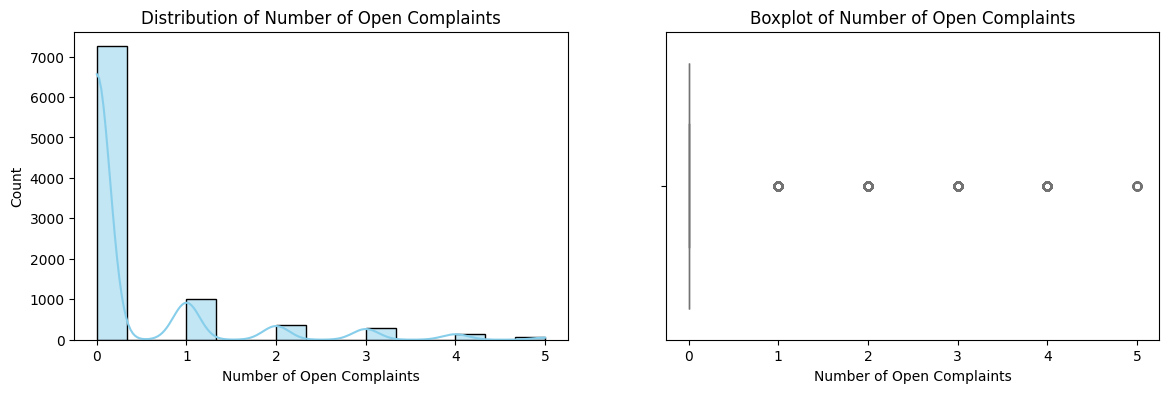

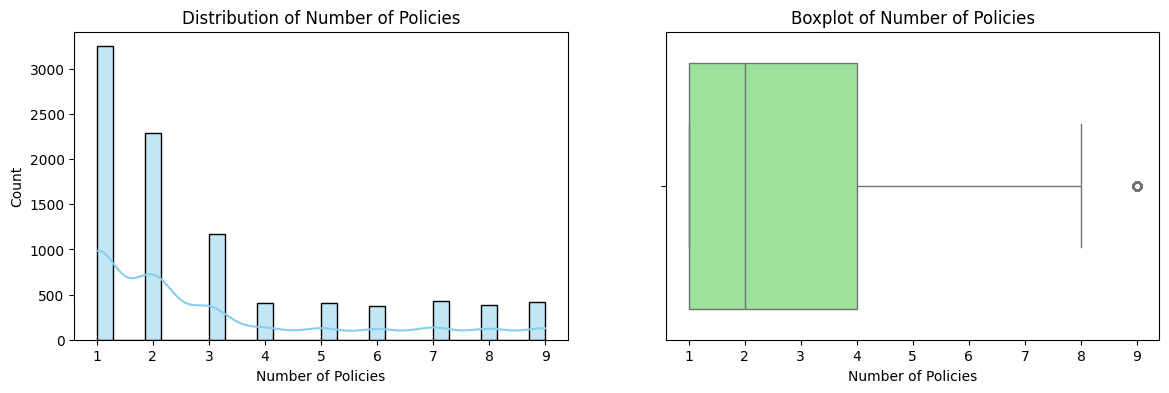

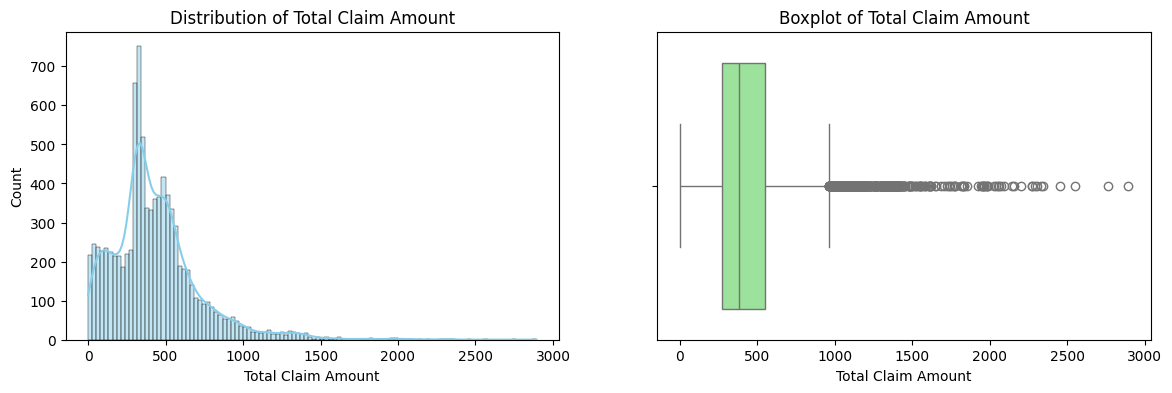

In [11]:
# 4.1 Histograms & Boxplots
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(14,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=col, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=col, color='lightgreen')
    plt.title(f"Boxplot of {col}")

    plt.show()


# Findings: Skewness and Outliers

It was found that the following columns exhibit skewness and outliers:

- **'Customer Lifetime Value'**
- **'Monthly Premium Auto'**
- **'Total Claim Amount'**
- **'Number of Open Complaints'**
- **'Number of Open Policies'**


### Handling Skewness

In [12]:
# Drop irrelevant columns
data_cleaned = data.drop(columns=["Customer"])

# Analyze numerical feature distributions
numerical_cols_cleaned = data_cleaned.select_dtypes(exclude=['object']).columns.tolist()
numerical_distributions = data_cleaned[numerical_cols_cleaned].describe()

# Calculate skewness for numerical columns
skewness = data_cleaned[numerical_cols_cleaned].skew()

# Apply log transformation to address skewness for highly skewed columns
data_transformed = data_cleaned.copy()
columns_to_transform = ['Customer Lifetime Value', 'Monthly Premium Auto','Total Claim Amount', 'Number of Open Complaints','Number of Policies']

for col in columns_to_transform:
    data_transformed[col] = np.log1p(data_transformed[col])  # log(1 + x) to handle zero values

# Recalculate skewness after transformation
transformed_skewness = data_transformed[columns_to_transform].skew()

# Combine skewness values before and after transformation for comparison
skewness_comparison = pd.DataFrame({
    "Original Skewness": skewness[columns_to_transform],
    "Transformed Skewness": transformed_skewness
})

# Display results
print("Numerical Feature Distributions (Before Transformation):\n", skewness)
print("\nSkewness Comparison:\n", skewness_comparison)


Numerical Feature Distributions (Before Transformation):
 Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

Skewness Comparison:
                            Original Skewness  Transformed Skewness
Customer Lifetime Value             3.032280              0.576172
Monthly Premium Auto                2.123546              1.013663
Total Claim Amount                  1.714966             -1.741369
Number of Open Complaints           2.783263              1.999011
Number of Policies                  1.253333              0.657633


###  "Total Claim Amount"  transformed negetively and how to overcome it?


In [13]:

# Define columns for transformation based on skewness and outlier range
columns_to_transform = ['Customer Lifetime Value', 'Monthly Premium Auto', 
                       # 'Number of Open Complaints', 
                        'Total Claim Amount', 
                         'Number of Policies',
                        ]

# Apply log transformation for positively skewed columns
transformed_data = data.copy()

for column in columns_to_transform:
    # Avoid transforming zero or negative values by adding a small constant
    if (transformed_data[column] <= 0).any():
        transformed_data[column] = np.log1p(transformed_data[column])  # log1p is log(1 + x)
    else:
        transformed_data[column], _ = boxcox(transformed_data[column])  # Box-Cox transformation

# Recheck skewness after transformation
transformed_skewness = transformed_data[columns_to_transform].skew()

# Function to identify and remove outliers using IQR
def detect_and_handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Remove outliers
    cleaned_data = data[~((data[column] < lower_bound) | (data[column] > upper_bound))]

    return cleaned_data, outliers



### Handling Outliers

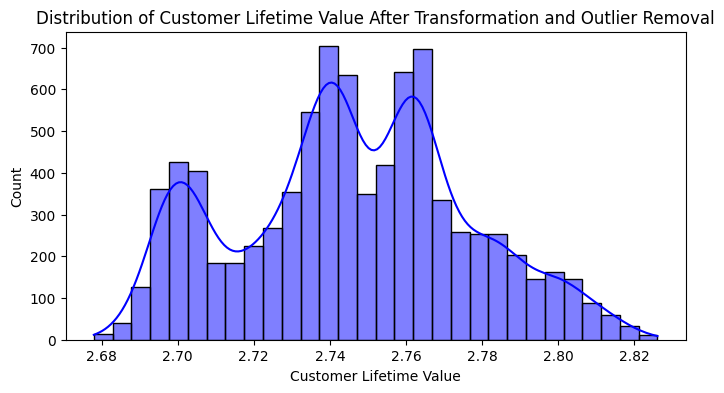

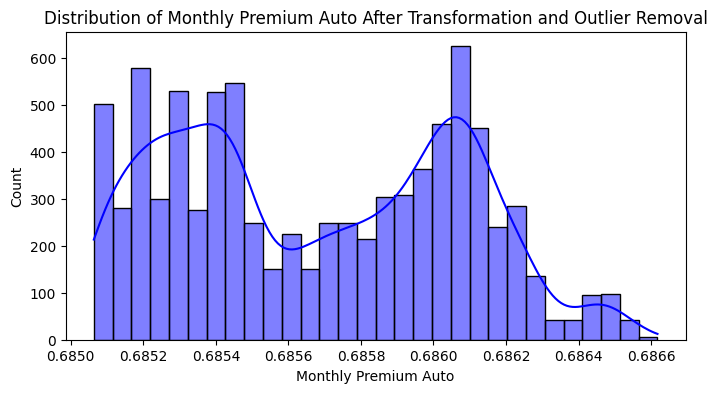

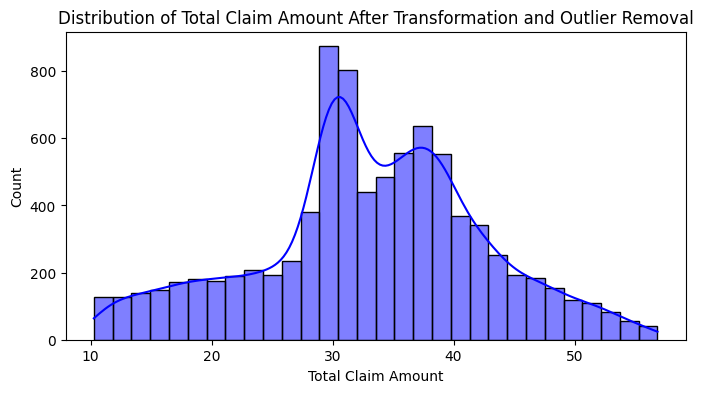

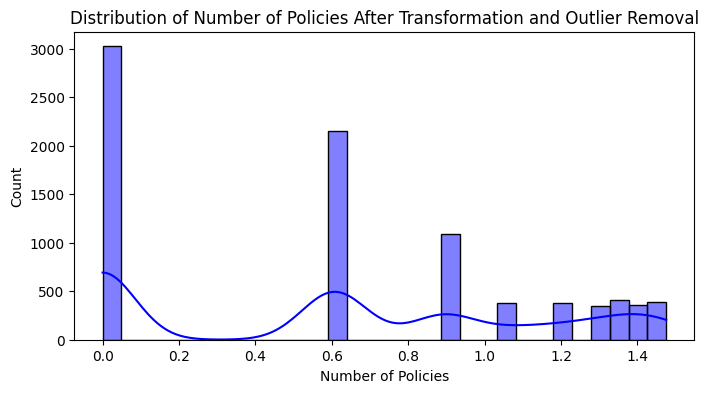

Summary of Outliers Removed:
                    Column  Outliers Removed
0  Customer Lifetime Value                 8
1     Monthly Premium Auto                 0
2       Total Claim Amount               599
3       Number of Policies                 0


In [14]:
# Apply the outlier detection function to the transformed columns
outliers_info = {}
cleaned_data = transformed_data.copy()

for column in columns_to_transform:
    cleaned_data, outliers = detect_and_handle_outliers(cleaned_data, column)
    outliers_info[column] = len(outliers)

# Visualize the remaining data distribution for transformed columns
for column in columns_to_transform:
    plt.figure(figsize=(8, 4))
    sns.histplot(cleaned_data[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column} After Transformation and Outlier Removal")
    plt.show()

# Summary of outliers removed
outliers_summary = pd.DataFrame({
    "Column": outliers_info.keys(),
    "Outliers Removed": outliers_info.values()
})

# Display the summary of outliers removed
print("Summary of Outliers Removed:")
print(outliers_summary)


## Cleaned Numerical Data

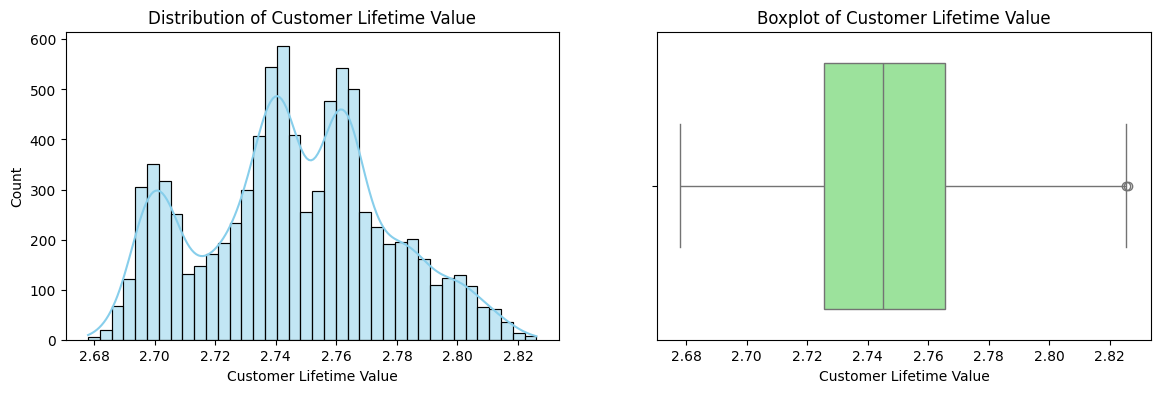

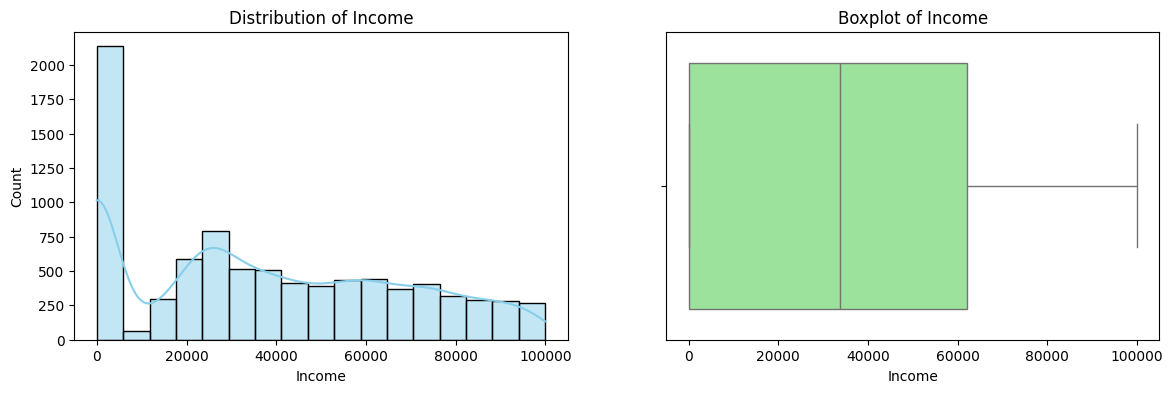

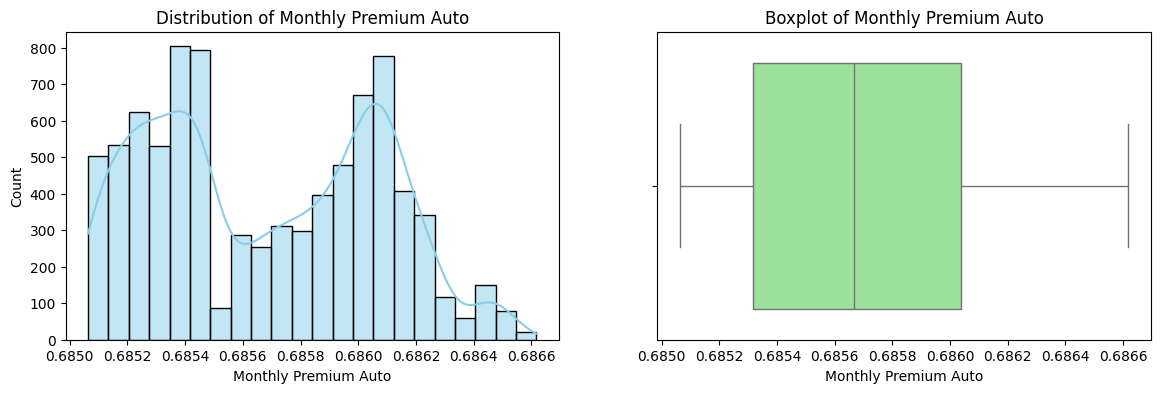

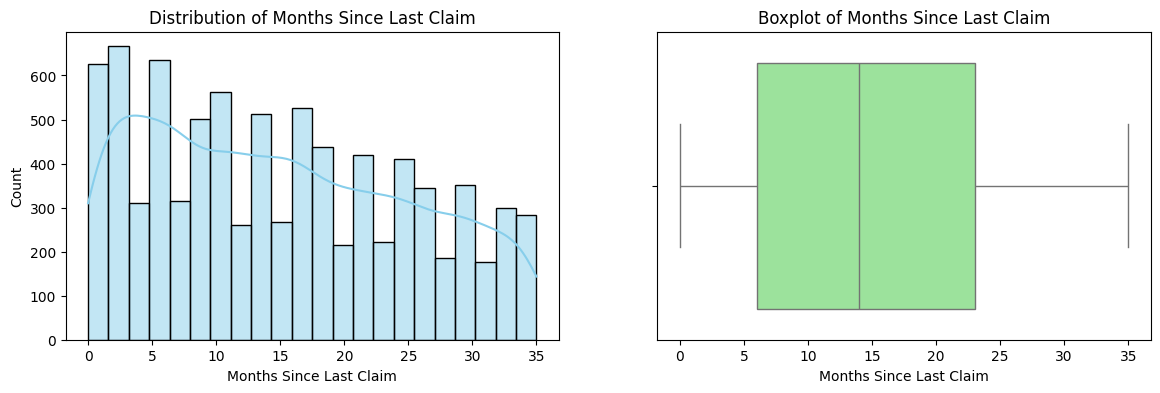

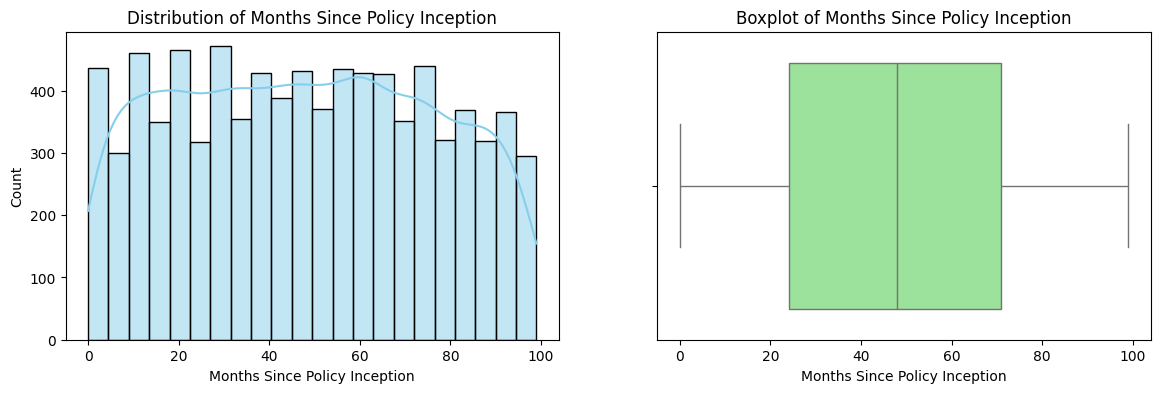

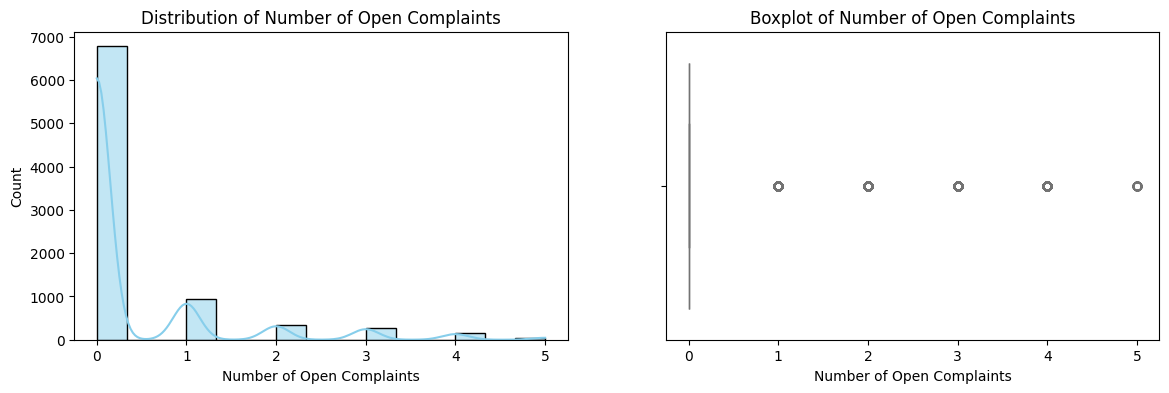

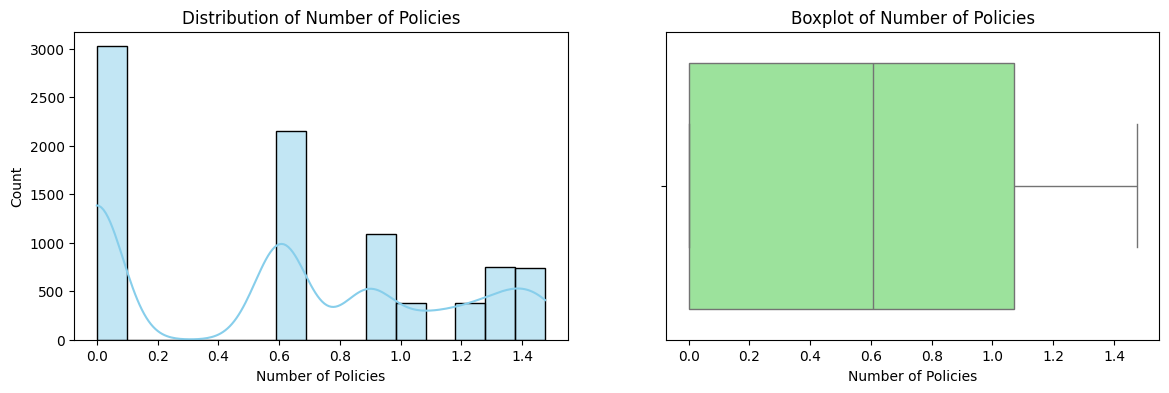

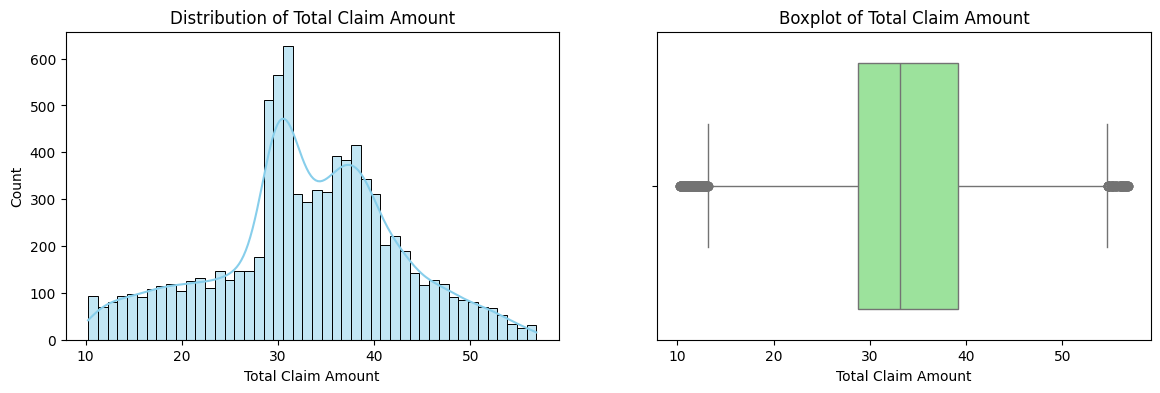

In [15]:
# 4.1 Histograms & Boxplots
numeric_cols = cleaned_data.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(14,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data=cleaned_data, x=col, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=cleaned_data, x=col, color='lightgreen')
    plt.title(f"Boxplot of {col}")

    plt.show()


## Data Correlation

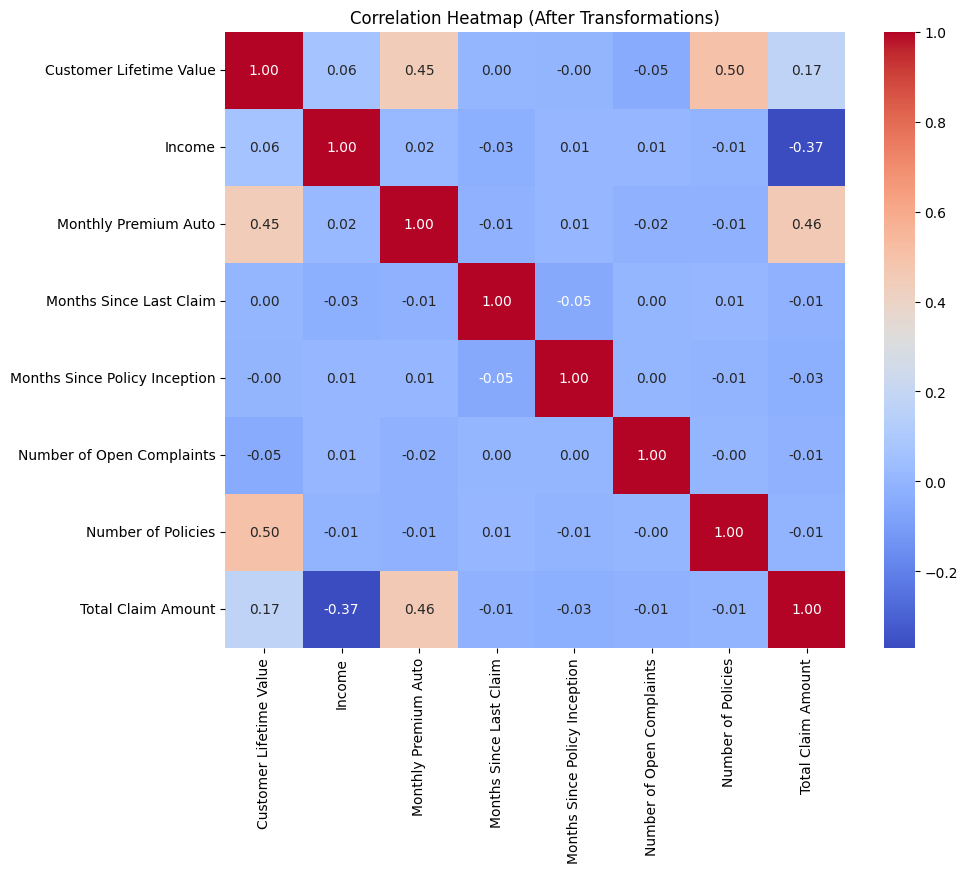

In [16]:

#data.drop(['Customer Lifetime Value', 'Total Claim Amount','Monthly Premium Auto',], axis=1, inplace=True)
corr_matrix = cleaned_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (After Transformations)")
plt.show()

### Observations from the Correlation Heatmap

1. **Customer Lifetime Value (CLV)**:
   - Strong correlation with `Number of Policies` (**0.50**).
   - Moderate correlation with `Monthly Premium Auto` (**0.45**).

2. **Income**:
   - Moderate negative correlation with `Total Claim Amount` (**-0.38**).

3. **Monthly Premium Auto**:
   - Moderate positive correlation with `Total Claim Amount` (**0.46**).
   - Weak correlation with `Customer Lifetime Value` (**0.45**).

4. **Other Features**:
   - `Months Since Last Claim`, `Months Since Policy Inception`, and `Number of Open Complaints` show weak or no correlations with most other features.


# Hypothesis Tesing on some Columns to find some Insights on Data in Hand

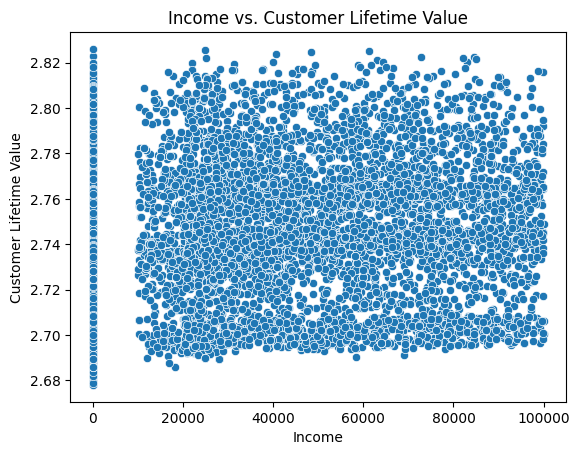

Correlation between Income and CLV: 0.06 (P-value: 2.19e-09)
The correlation is statistically significant.


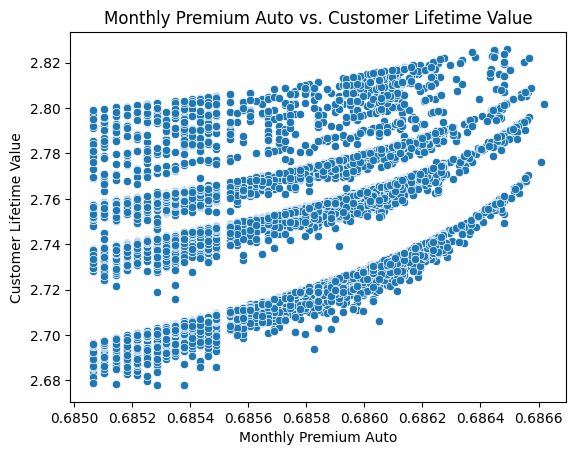

Correlation between Monthly Premium Auto and CLV: 0.45 (P-value: 0.00e+00)
The correlation is statistically significant.


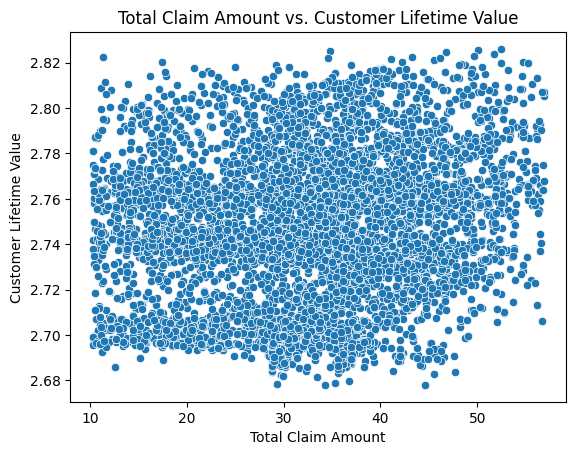

Correlation between Total Claim Amount and CLV: 0.17 (P-value: 8.32e-59)
The correlation is statistically significant.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

# Load the cleaned dataset
Hypothesis_data = cleaned_data

# Hypothesis 1: Higher Income leads to higher CLV
# Scatterplot for Income vs. CLV
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=Hypothesis_data)
plt.title("Income vs. Customer Lifetime Value")
plt.xlabel("Income")
plt.ylabel("Customer Lifetime Value")
plt.show()

# Correlation between Income and CLV
corr, p_value = pearsonr(Hypothesis_data['Income'], Hypothesis_data['Customer Lifetime Value'])
print(f"Correlation between Income and CLV: {corr:.2f} (P-value: {p_value:.2e})")
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Hypothesis 2: Monthly Premium Auto affects CLV
# Scatterplot for Monthly Premium Auto vs. CLV
sns.scatterplot(x='Monthly Premium Auto', y='Customer Lifetime Value', data=Hypothesis_data)
plt.title("Monthly Premium Auto vs. Customer Lifetime Value")
plt.xlabel("Monthly Premium Auto")
plt.ylabel("Customer Lifetime Value")
plt.show()

# Correlation between Monthly Premium Auto and CLV
corr, p_value = pearsonr(Hypothesis_data['Monthly Premium Auto'], Hypothesis_data['Customer Lifetime Value'])
print(f"Correlation between Monthly Premium Auto and CLV: {corr:.2f} (P-value: {p_value:.2e})")
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Hypothesis 3: Total Claim Amount affects CLV
# Scatterplot for Total Claim Amount vs. CLV
sns.scatterplot(x='Total Claim Amount', y='Customer Lifetime Value', data=Hypothesis_data)
plt.title("Total Claim Amount vs. Customer Lifetime Value")
plt.xlabel("Total Claim Amount")
plt.ylabel("Customer Lifetime Value")
plt.show()

# Correlation between Total Claim Amount and CLV
corr, p_value = pearsonr(Hypothesis_data['Total Claim Amount'], Hypothesis_data['Customer Lifetime Value'])
print(f"Correlation between Total Claim Amount and CLV: {corr:.2f} (P-value: {p_value:.2e})")
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


# Categerical Analysis

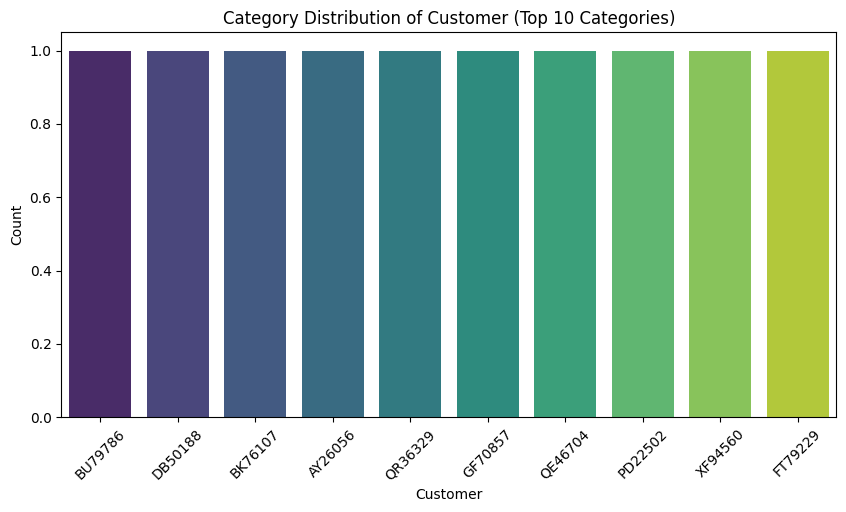

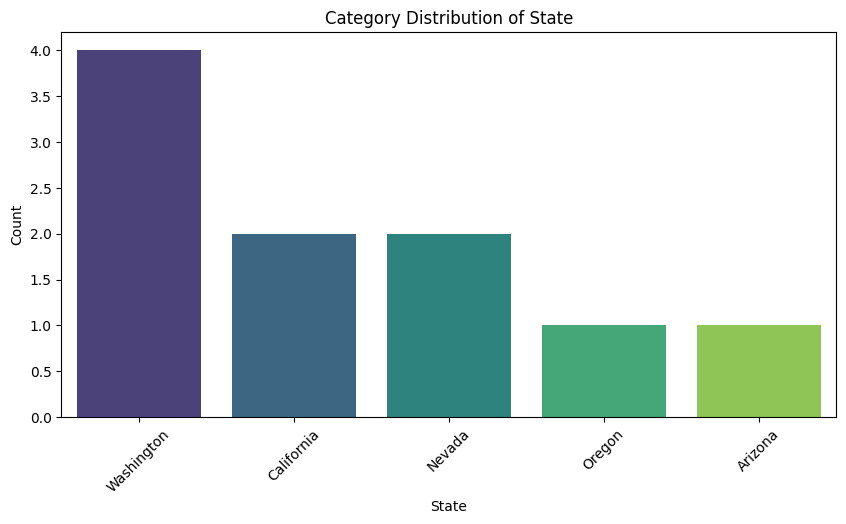

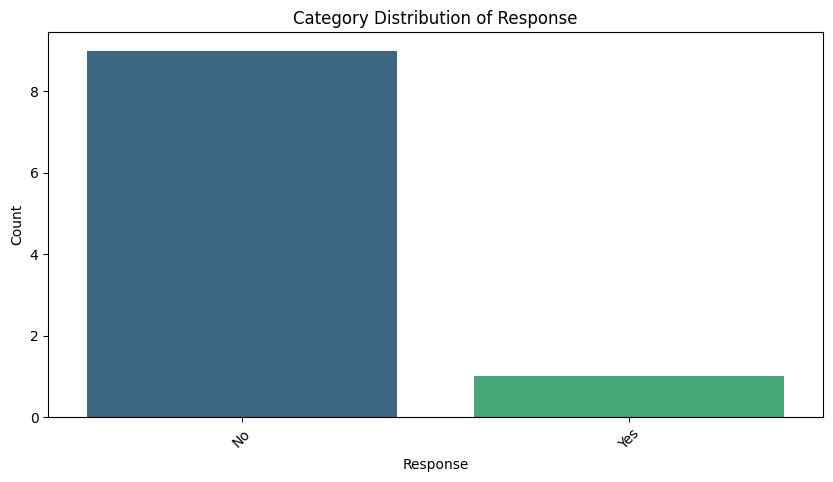

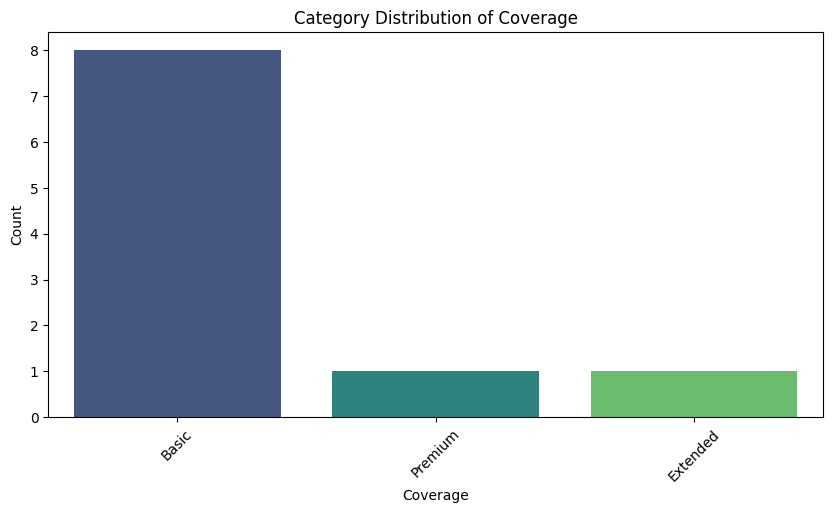

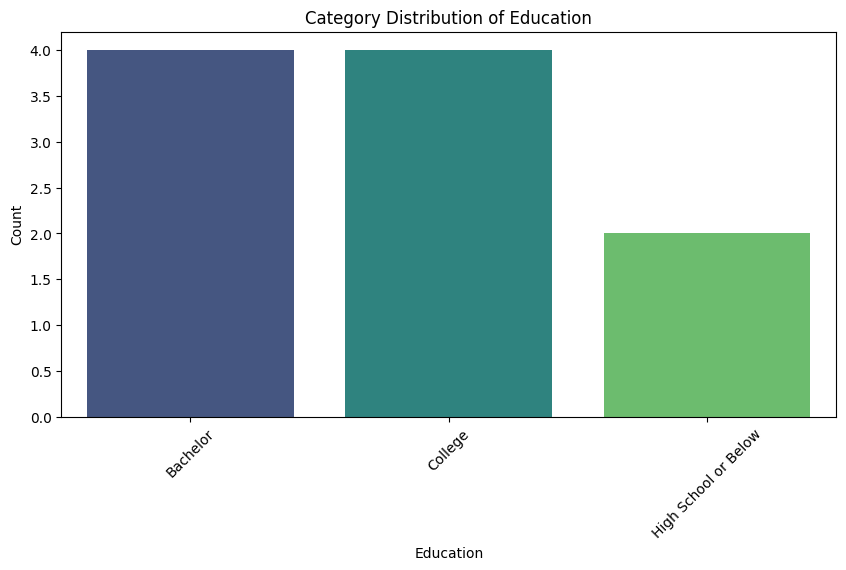

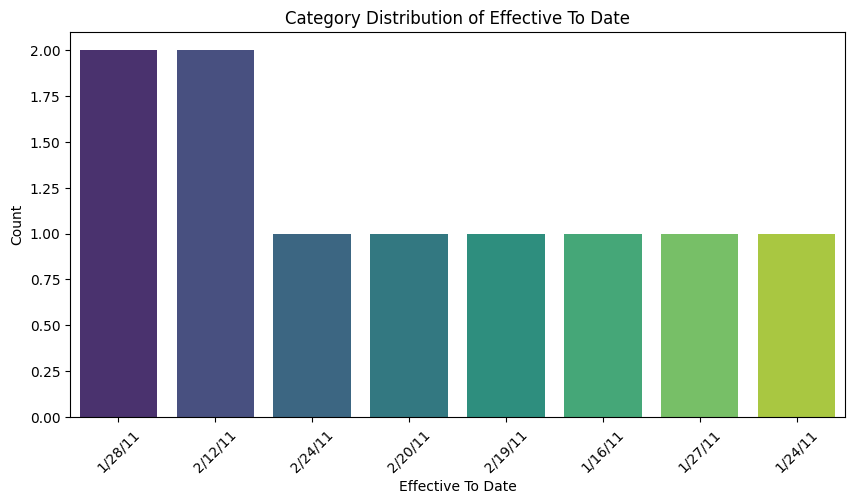

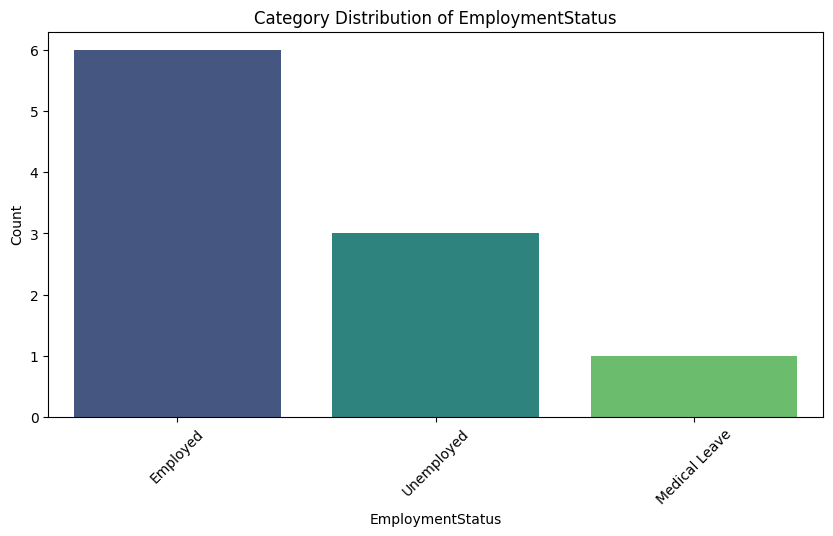

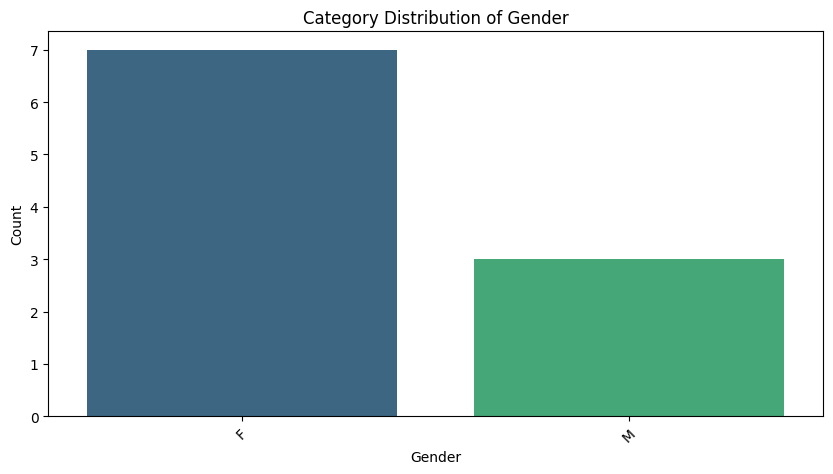

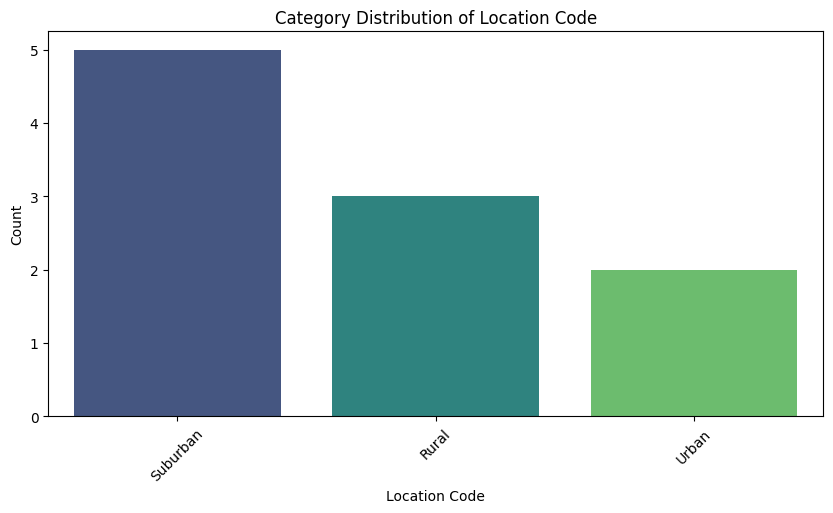

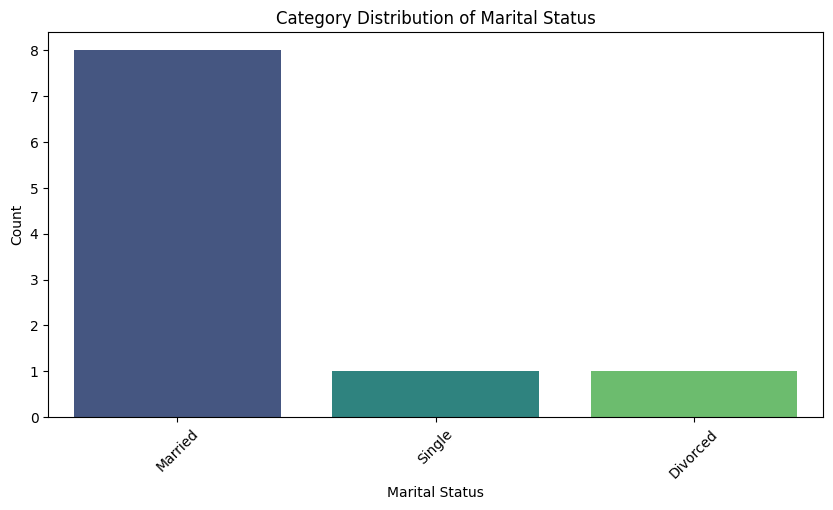

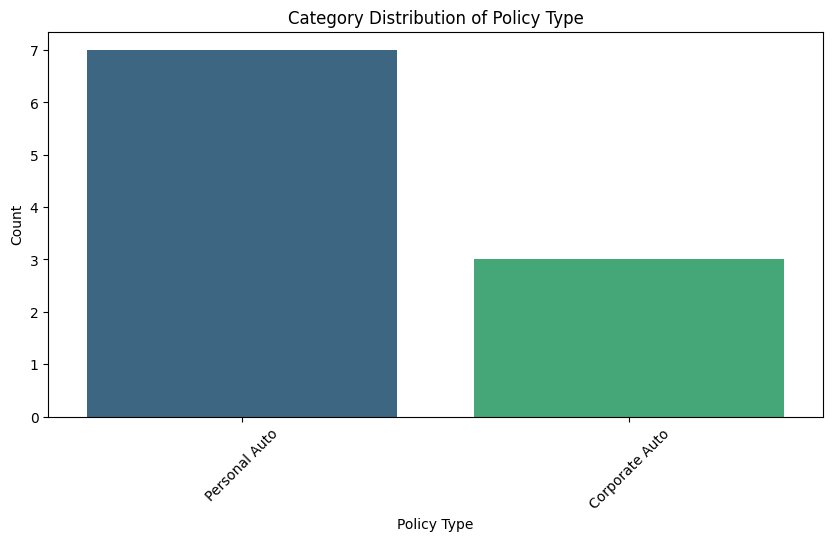

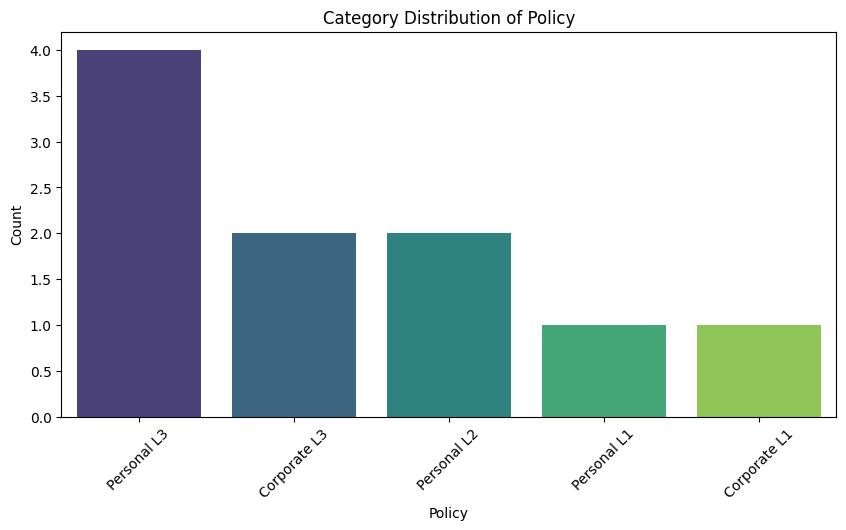

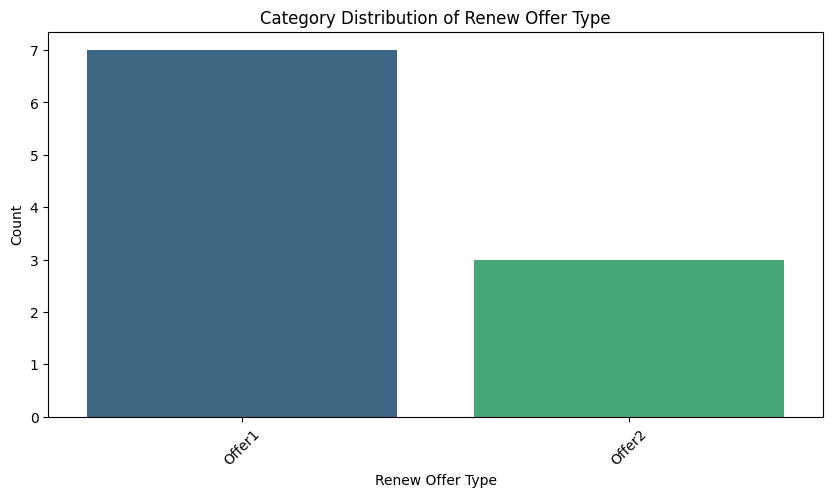

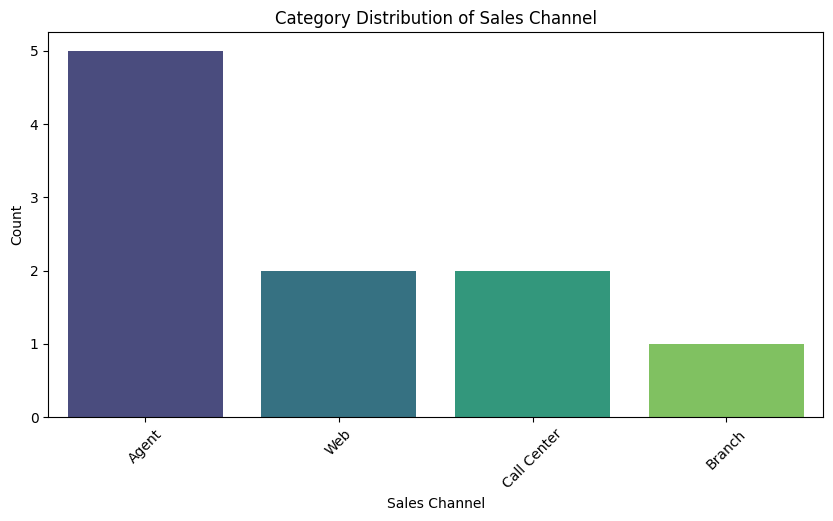

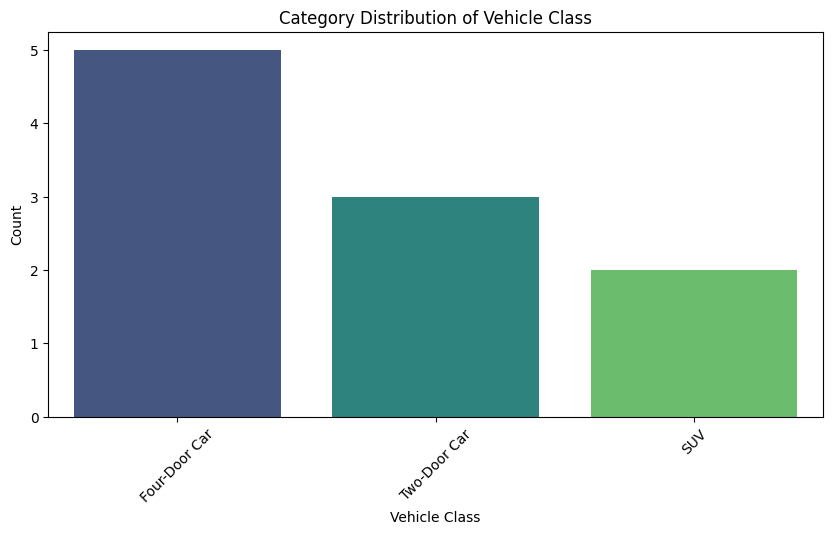

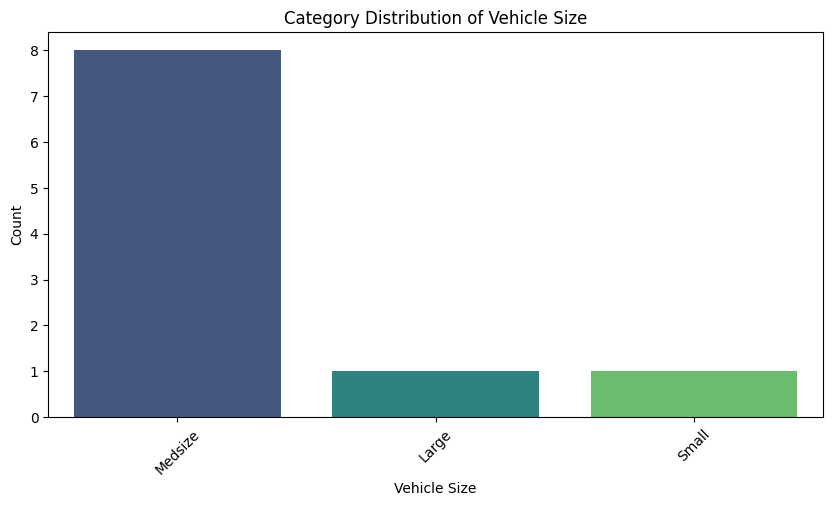

In [18]:

def visualize_categorical_distributions(cleaned_data, categorical_columns, max_categories=10):
    """
    Visualize the distribution of categorical features in the dataset.
    
    Parameters:
        df (pd.DataFrame): The dataset.
        categorical_columns (list): List of categorical columns to visualize.
        max_categories (int): Maximum number of categories to display for high-cardinality features.
    """
    
    for col in categorical_columns:
        unique_categories = cleaned_data[col].nunique()
        if unique_categories > max_categories:
            # Limit to top categories for high-cardinality columns
            top_categories = cleaned_data[col].value_counts().head(max_categories).index
            cleaned_data = cleaned_data[cleaned_data[col].isin(top_categories)]
            title_suffix = f" (Top {max_categories} Categories)"
        else:
            cleaned_data = cleaned_data
            title_suffix = ""
        
        plt.figure(figsize=(10, 5))
        sns.countplot(data=cleaned_data, x=col, palette="viridis", order=cleaned_data[col].value_counts().index)
        plt.title(f"Category Distribution of {col}{title_suffix}")
        plt.xticks(rotation=45)
        plt.ylabel("Count")
        plt.show()

# Example usage
categorical_columns = cleaned_data.select_dtypes(include=['object', 'category']).columns.tolist()
#visualize_categorical_distributions(ck, categorical_columns, max_categories=10)


visualize_categorical_distributions(cleaned_data, categorical_columns, max_categories=10)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 6821, number of used features: 16
[LightGBM] [Info] Start training from score 2.746060
              Feature  Importance
0            Customer         664
5   Effective To Date         566
14      Vehicle Class         198
4           Education         179
6    EmploymentStatus         161
1               State         160
12   Renew Offer Type         155
13      Sales Channel         154
3            Coverage         133
11             Policy         127
9      Marital Status         126
2            Response         104
7              Gender          81
8       Location Code          74
15    

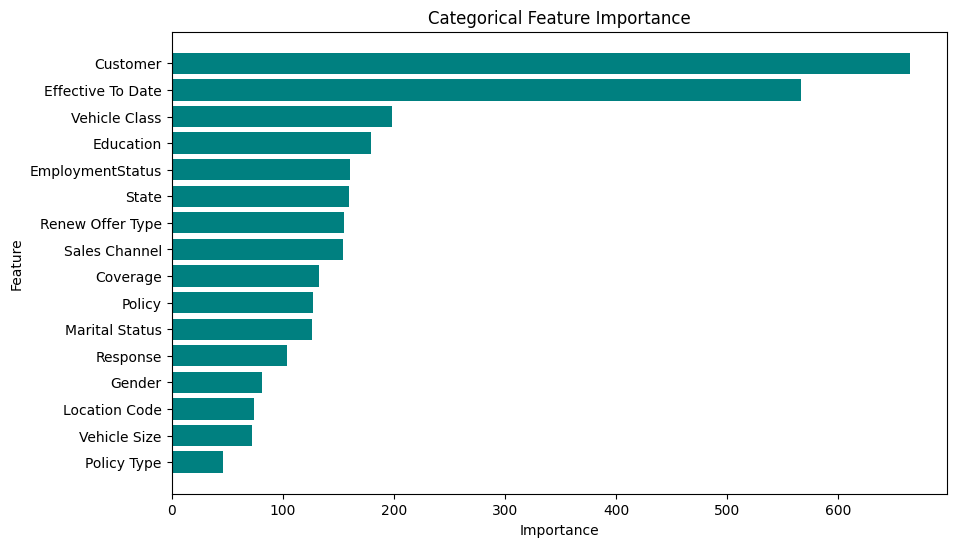

In [19]:
# Encode all categorical variables
cleaned_data_before_Transfromr=cleaned_data.copy()
categorical_columns = cleaned_data.select_dtypes(include=['object', 'category']).columns.tolist()
encoder = LabelEncoder()
for col in categorical_columns:
    cleaned_data[col] = encoder.fit_transform(cleaned_data[col])

# Define features and target
X = cleaned_data[categorical_columns]
y = cleaned_data['Customer Lifetime Value']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM model
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Feature importance for all categorical variables
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)

# Optional: Plot the feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Categorical Feature Importance')
plt.show()


In [20]:
# Select numerical features for VIF calculation
numerical_features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Customer Lifetime Value'], errors='ignore')

# Add a constant column for VIF calculation
X = add_constant(numerical_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

# Interpretation of Results
print("\nInterpretation:")
print("- A high VIF value for 'const' is expected and does not indicate multicollinearity.")
print("- VIF values for all features are below 5, meaning multicollinearity is not a concern.")
print("- All variables can be retained in the model without further preprocessing.")


                         Feature        VIF
0                          const  17.306327
1                         Income   1.248167
2           Monthly Premium Auto   1.815995
3        Months Since Last Claim   1.002756
4  Months Since Policy Inception   1.002638
5      Number of Open Complaints   1.000274
6             Number of Policies   1.000454
7             Total Claim Amount   2.076623

Interpretation:
- A high VIF value for 'const' is expected and does not indicate multicollinearity.
- VIF values for all features are below 5, meaning multicollinearity is not a concern.
- All variables can be retained in the model without further preprocessing.


# 2. Feature Inspection & Basic Cleaning
Drop duplicates if any.
Handle missing values if they exist.
Convert date columns (e.g., Effective To Date) to datetime.
Remove ID column (Customer) from features.

In [21]:

# Dropping 'Effective Date' column inplace
columns_to_drop = ['Effective To Date', 'Customer']
df = cleaned_data.drop(columns=columns_to_drop, errors='ignore')


# Drop duplicates
df.drop_duplicates(inplace=True)
# Drop rows where target is missing
df = df.dropna(subset=['Customer Lifetime Value'])

# Example: If you want to fill numeric/categorical columns, you can do so here:
# df['Income'].fillna(df['Income'].median(), inplace=True)
# df['State'].fillna(df['State'].mode()[0], inplace=True)
# etc.

# Drop or keep the Customer ID column out of the model
if 'Customer' in df.columns:
    df.drop('Customer', axis=1, inplace=True)
    


# 3. Target and Feature Selection

In [22]:
TARGET_COL = 'Customer Lifetime Value'

# We remove the target from feature columns
features = df.drop(columns=[TARGET_COL]).columns.to_list()

X = df[features].copy()
y = df[TARGET_COL].copy()


# 4. Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.4, #0.2
    random_state=46 #42
)


# 5. Preprocessing Pipeline
We’ll separate categorical vs. numeric features for transformation.

In [24]:
# Identify numeric and categorical columns
numeric_features = []
categorical_features = []

for col in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[col]):
        numeric_features.append(col)
    else:
        categorical_features.append(col)

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


# 6. Building Individual Models with Optuna


### Cross Validation Function

In [25]:
# 6.1 Helper Function for Cross-Validation

def cv_rmse(model, X, y, folds=7):
    """
    Returns the average RMSE from cross-validation.
    """
    scores = cross_val_score(
        model,
        X,
        y,
        scoring='neg_root_mean_squared_error',
        cv=KFold(n_splits=folds, shuffle=True, random_state=46),
        n_jobs=-1
    )
    return -scores.mean()


### Pipeline For the Model

#### We’ll create OPTUNA studies to tune each model: XGBoost, LightGBM, and CatBoost. After tuning, we’ll retrieve the best versions of each and ensemble them.

We will be using pretrained model here to minimise the execution time.

In [26]:

# Filepath for the saved ensemble and individual pipelines
model_path = "final_ensemble_pipeline.joblib"
xgb_model_path = "pipeline_xgb_best.pkl"
lgb_model_path = "pipeline_lgb_best.pkl"
cat_model_path = "pipeline_cat_best.pkl"

# Check if the saved pipeline exists
if os.path.exists(model_path):
    print("Saved pipeline found. Loading the ensemble pipeline...")
    final_ensemble_pipeline = load(model_path)
    print("Ensemble pipeline loaded successfully!")
else:
    print("No saved pipeline found. Training a new ensemble pipeline...")
    # 6.2 XGBoost + Optuna
    def objective_xgb(trial):
        # Hyperparameters to tune
        params = {
            "xgb__n_estimators": trial.suggest_int("xgb__n_estimators", 100, 1000),
            "xgb__max_depth": trial.suggest_int("xgb__max_depth", 2, 10),
            "xgb__learning_rate": trial.suggest_float("xgb__learning_rate", 1e-3, 0.3, log=True),
            "xgb__subsample": trial.suggest_float("xgb__subsample", 0.5, 1.0),
            "xgb__colsample_bytree": trial.suggest_float("xgb__colsample_bytree", 0.5, 1.0),
            "xgb__reg_alpha": trial.suggest_float("xgb__reg_alpha", 1e-8, 10.0, log=True),
            "xgb__reg_lambda": trial.suggest_float("xgb__reg_lambda", 1e-8, 10.0, log=True),
        }
    
        # Create pipeline for each trial
        pipeline_xgb = Pipeline([
            ("preprocessor", preprocessor),
            ("xgb", XGBRegressor(random_state=42, tree_method="gpu_hist", enable_categorical=False))
        ])
        pipeline_xgb.set_params(**params)
    
        # Evaluate using cross-validation
        rmse = cv_rmse(pipeline_xgb, X_train, y_train, folds=7)
        return rmse
    
    study_xgb = optuna.create_study(direction="minimize")
    study_xgb.optimize(objective_xgb, n_trials=20, show_progress_bar=True)
    print("XGB Best Trial:", study_xgb.best_trial.params)
    
    # 6.3 LightGBM + Optuna
    def objective_lgb(trial):
        params = {
            "lgb__n_estimators": trial.suggest_int("lgb__n_estimators", 100, 1000),
            "lgb__num_leaves": trial.suggest_int("lgb__num_leaves", 2, 128),
            "lgb__learning_rate": trial.suggest_float("lgb__learning_rate", 1e-3, 0.3, log=True),
            "lgb__subsample": trial.suggest_float("lgb__subsample", 0.5, 1.0),
            "lgb__colsample_bytree": trial.suggest_float("lgb__colsample_bytree", 0.5, 1.0),
            "lgb__reg_alpha": trial.suggest_float("lgb__reg_alpha", 1e-8, 10.0, log=True),
            "lgb__reg_lambda": trial.suggest_float("lgb__reg_lambda", 1e-8, 10.0, log=True),
        }
    
        pipeline_lgb = Pipeline([
            ("preprocessor", preprocessor),
            ("lgb", LGBMRegressor(random_state=46, tree_method="gpu_hist"))
        ])
        pipeline_lgb.set_params(**params)
    
        rmse = cv_rmse(pipeline_lgb, X_train, y_train, folds=7)
        return rmse
    
    study_lgb = optuna.create_study(direction="minimize")
    study_lgb.optimize(objective_lgb, n_trials=20, show_progress_bar=True)
    print("LightGBM Best Trial:", study_lgb.best_trial.params)
    
    # 6.4 CatBoost + Optuna
    def objective_cat(trial):
        params = {
            "cat__iterations": trial.suggest_int("cat__iterations", 100, 1000),
            "cat__depth": trial.suggest_int("cat__depth", 2, 10),
            "cat__learning_rate": trial.suggest_float("cat__learning_rate", 1e-3, 0.3, log=True),
            "cat__subsample": trial.suggest_float("cat__subsample", 0.5, 1.0),
            "cat__l2_leaf_reg": trial.suggest_float("cat__l2_leaf_reg", 1e-8, 10.0, log=True),
        }
    
        # CatBoostRegressor (configured for GPU automatically if available)
        pipeline_cat = Pipeline([
            ("preprocessor", preprocessor),
            ("cat", CatBoostRegressor(random_state=46, verbose=0))
        ])
        pipeline_cat.set_params(**params)
    
        # Evaluate using cross-validation
        rmse = cv_rmse(pipeline_cat, X_train, y_train, folds=7)
        return rmse
    
    # Optimize with Optuna
    study_cat = optuna.create_study(direction="minimize")
    study_cat.optimize(objective_cat, n_trials=20, show_progress_bar=True)
    print("CatBoost Best Trial:", study_cat.best_trial.params)

    # Build final pipelines with best params and save them
    # --- XGB ---
    best_params_xgb = study_xgb.best_trial.params
    pipeline_xgb_best = Pipeline([
        ("preprocessor", preprocessor),
        ("xgb", XGBRegressor(random_state=46, tree_method="auto"))
    ])
    pipeline_xgb_best.set_params(**best_params_xgb)
    pipeline_xgb_best.fit(X_train, y_train)
    dump(pipeline_xgb_best, xgb_model_path)
    
    # --- LGB ---
    best_params_lgb = study_lgb.best_trial.params
    pipeline_lgb_best = Pipeline([
        ("preprocessor", preprocessor),
        ("lgb", LGBMRegressor(random_state=46))
    ])
    pipeline_lgb_best.set_params(**best_params_lgb)
    pipeline_lgb_best.fit(X_train, y_train)
    dump(pipeline_lgb_best, lgb_model_path)
    
    # --- CatBoost ---
    best_params_cat = study_cat.best_trial.params
    pipeline_cat_best = Pipeline([
        ("preprocessor", preprocessor),
        ("cat", CatBoostRegressor(random_state=42, verbose=0))
    ])
    pipeline_cat_best.set_params(**best_params_cat)
    pipeline_cat_best.fit(X_train, y_train)
    dump(pipeline_cat_best, cat_model_path)
    
    # Ensemble Pipeline
    ensemble_model = VotingRegressor(
        estimators=[
            ("xgb", pipeline_xgb_best["xgb"]), 
            ("lgb", pipeline_lgb_best["lgb"]), 
            ("cat", pipeline_cat_best["cat"])
        ],
        weights=[1, 1, 1]  # or custom weights
    )
    final_ensemble_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("ensemble", ensemble_model)
    ])
    final_ensemble_pipeline.fit(X_train, y_train)
    dump(final_ensemble_pipeline, model_path)
    print("All pipelines trained and saved successfully!")


Saved pipeline found. Loading the ensemble pipeline...
Ensemble pipeline loaded successfully!


# 8. Evaluate on Test Set

Validation Metrics:
Validation MSE: 0.00
Validation RMSE: 0.01
Validation MAE: 0.00
Validation MAPE: 0.11%
Validation R^2: 0.97

Test Metrics:
Test MSE: 0.00
Test RMSE: 0.01
Test MAE: 0.00
Test MAPE: 0.14%
Test R^2: 0.95



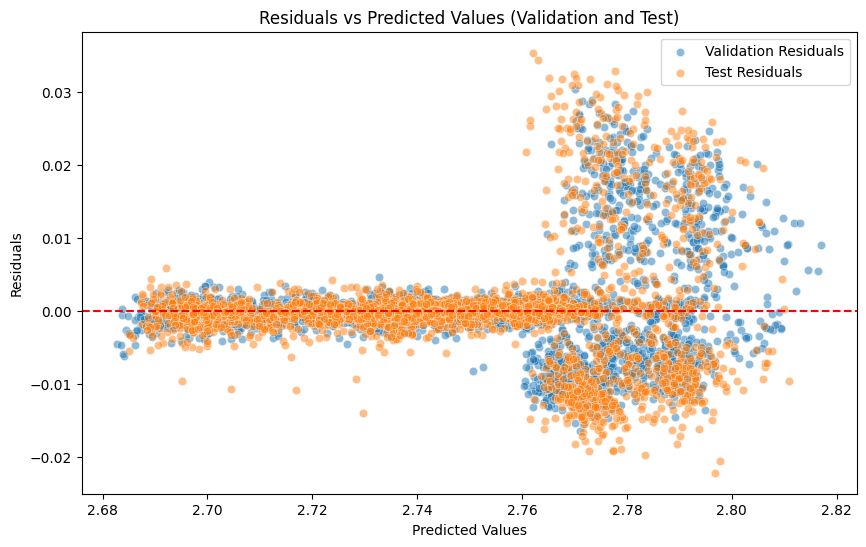

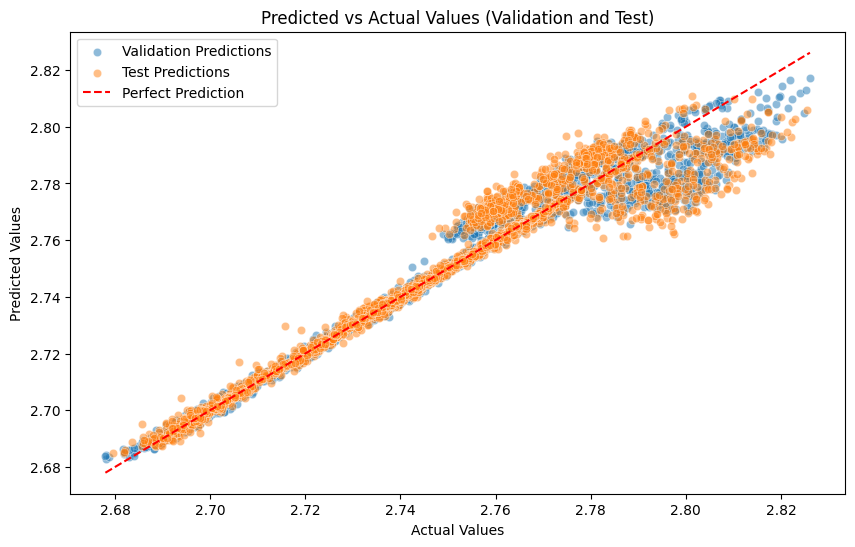

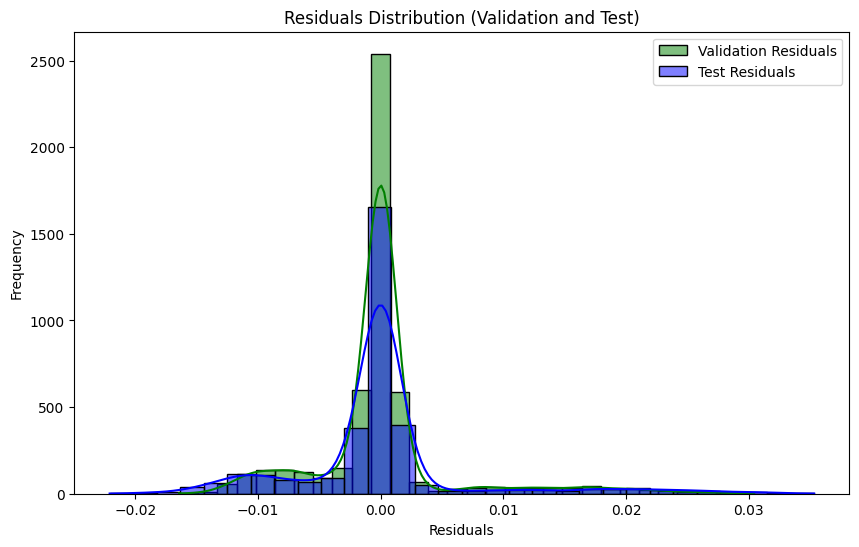

In [27]:
# Predictions for validation and test sets
y_val_pred = final_ensemble_pipeline.predict(X_train)  # Replace X_val and y_val with your validation set variables
y_test_pred = final_ensemble_pipeline.predict(X_test)

# Metrics for validation set
val_mse = mean_squared_error(y_train, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_train, y_val_pred)
val_mape = mean_absolute_percentage_error(y_train, y_val_pred)
val_r2 = r2_score(y_train, y_val_pred)

print("Validation Metrics:")
print(f"Validation MSE: {val_mse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation MAPE: {val_mape:.2%}")
print(f"Validation R^2: {val_r2:.2f}")
print()

# Metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Metrics:")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2%}")
print(f"Test R^2: {test_r2:.2f}")
print()

# Combined Visualizations

# Residuals Plot (Validation + Test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_pred, y=y_train - y_val_pred, alpha=0.5, label="Validation Residuals")
sns.scatterplot(x=y_test_pred, y=y_test - y_test_pred, alpha=0.5, label="Test Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Validation and Test)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Predicted vs Actual Plot (Validation + Test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_val_pred, alpha=0.5, label="Validation Predictions")
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5, label="Test Predictions")
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Values (Validation and Test)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Error Distribution (Validation + Test)
plt.figure(figsize=(10, 6))
sns.histplot(y_train - y_val_pred, kde=True, bins=30, color='green', label="Validation Residuals", alpha=0.5)
sns.histplot(y_test - y_test_pred, kde=True, bins=30, color='blue', label="Test Residuals", alpha=0.5)
plt.title('Residuals Distribution (Validation and Test)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Insights from Residual and Predicted vs Actual Analysis

## 1. Residuals vs Predicted Values
- **Pattern**: Residuals are evenly distributed around zero with no clear pattern, indicating a good fit.
- **Spread**: Most residuals are tightly centered around the red line, with a few outliers at extreme predicted values.

## 2. Predicted vs Actual Values
- **Alignment**: Predicted values closely align with actual values along the red "Perfect Prediction" line, showcasing high model accuracy.
- **Validation and Test Sets**: Both sets exhibit similar performance, indicating no overfitting or underfitting.

## 3. Residuals Distribution
- **Symmetry**: Residuals are symmetrically distributed around zero, following a bell-curve pattern.
- **Overlap**: Validation and test residual distributions are nearly identical, reinforcing model consistency.

## General Observations
- **Good Fit**: The model performs well on both validation and test data, as evidenced by small residuals and close predicted-to-actual alignment.
- **No Major Bias**: No evident systematic bias or heteroscedasticity in residuals.


# 9. Model Explainability with SHAP
SHAP can be applied to one of the final models (e.g., the best XGB) or to the ensemble in a more limited way. Typically, it’s easier to interpret a single-model approach.

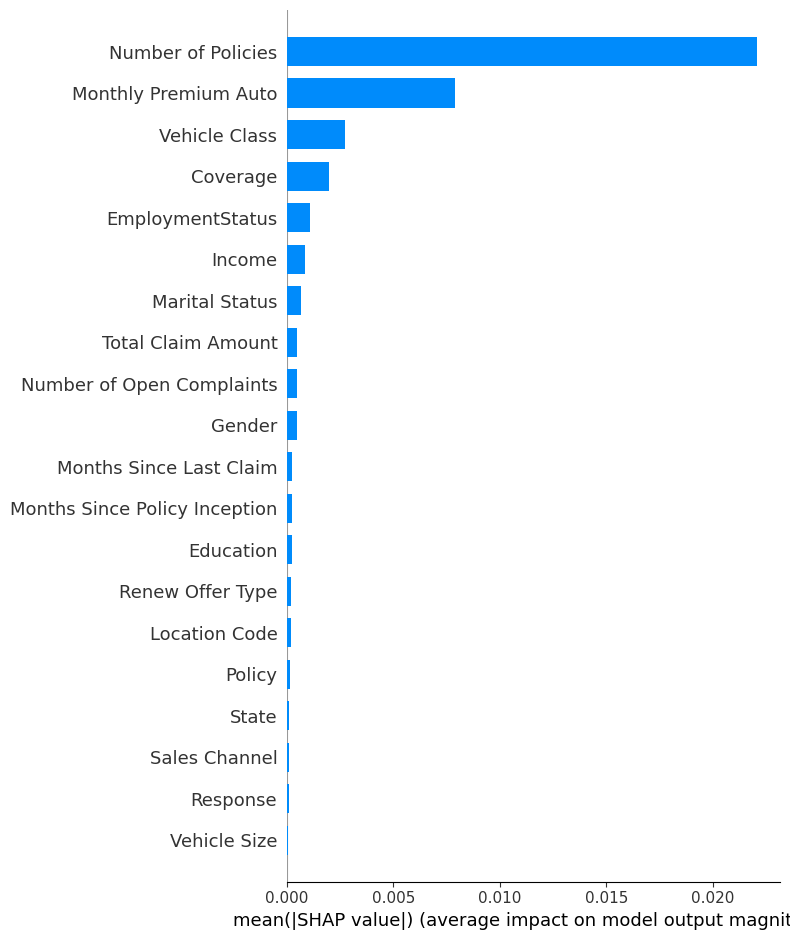

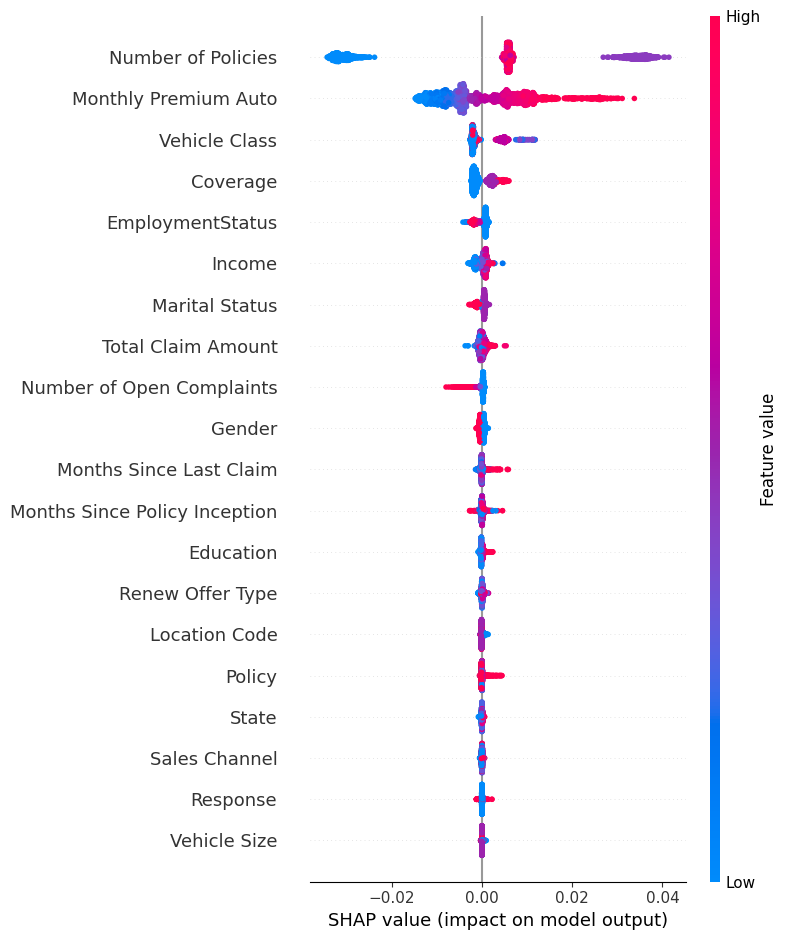

In [28]:
# Load the saved XGBoost pipeline
pipeline_xgb_best = load("pipeline_xgb_best.pkl")

# Access the XGBoost model
xgb_model = pipeline_xgb_best["xgb"]

# Transform test data using the preprocessor
X_test_transformed = pipeline_xgb_best["preprocessor"].transform(X_test)

# Create the SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_transformed)

# Retrieve feature names
def get_feature_names_from_ColumnTransformer(ct):
    """
    Utility to extract final feature names after ColumnTransformer
    with OneHotEncoder and numeric transforms.
    """
    output_features = []
    for name, transformer, cols in ct.transformers_:
        if name == "num":
            # Numeric columns
            output_features += cols
        elif name == "cat":
            # Categorical columns
            ohe = transformer
            for i, col_name in enumerate(cols):
                cats = ohe.categories_[i]
                for cat in cats[1:]:  # drop='first'
                    output_features.append(f"{col_name}_{cat}")
    return output_features

feature_names = get_feature_names_from_ColumnTransformer(pipeline_xgb_best["preprocessor"])

# SHAP summary plots
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type="bar")
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


# Insights from SHAP Analysis

## Summary Plot
- **Number of Policies**: The most impactful feature on model predictions.
- **Monthly Premium Auto**: Second most significant feature, indicating its importance in decision-making.
- **Vehicle Class and Coverage**: Moderate impact on predictions.
- **Other Features**: Variables like EmploymentStatus, Income, and Marital Status have minor contributions.

## Beeswarm Plot
- **Number of Policies**: High values tend to have a positive impact, while low values negatively influence predictions.
- **Monthly Premium Auto**: Mixed influence, with both high and low values affecting predictions positively and negatively.
- **Categorical Features**: Variables like Coverage and Vehicle Class show clustered impacts based on their categorical values.
- **Negligible Impact**: Features like Vehicle Size, Response, and Sales Channel have minimal effect on the model's output.

## General Observations
- A few features dominate the model's predictions, while many others contribute minimally.
- Continuous and categorical variables show distinct SHAP value patterns.
